# Visualise the difference in gradients induced between the original GAN loss and the non-saturating loss

Author: Mihaela Rosca 

In both cases the discriminator is trained using a cross entropy loss:
$$ \max_{\phi} E_{p^*(x)} \log D_{\phi}(x) + E_{p(z)} \log (1 - D_{\phi}{G_{\theta}(z)))} $$

In the case of the zero sum loss the generator is trained using the objective:
$$ \min_{\theta} E_{p(z)} \log (1 - D_{\phi}(G_{\theta}(z))) $$

In the case of a non saturating loss, the generator is trained using the objective:
$$ \min_{\theta} E_{p(z)} - \log (D_{\phi}(G_{\theta}(z))) $$


We want to see how the gradients of these generator losses behave with respect
to the $D_{\phi}(G_{\theta}(z))$. This would tell us something about when the 
generator is learning, as we would like to get a good learning signal when the generator is doing badly (the discriminator can tell the generated data is fake, i.e. $D_{\phi}(G_{\theta}(z))$ is small). Below we see that for the non-saturating loss, we obtain this behaviour, while for the zero sum (or saturating loss), the generator gets a lot less information on how to change when it is not performing well. 




In [2]:
import jax.numpy as jnp
import jax
from matplotlib import pyplot as plt
import seaborn as sns

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

In [3]:
latexify(width_scale_factor=2, fig_height=1.5)

/home/tensorboy/dev/env/lib/python3.8/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


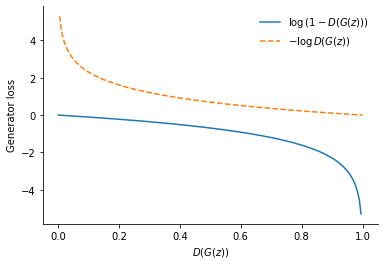

In [12]:
d_g_x = jnp.linspace(0.0, 1.0, 200)
loss1 = jnp.log(1 - d_g_x)
grad1 = 1 / (1 - d_g_x)

loss2 = -jnp.log(d_g_x)
grad2 = -1 / d_g_x


plt.figure()
plt.plot(d_g_x, loss1, label=r"$\log{(1 - D(G(z)))}$")
plt.plot(d_g_x, loss2, label="$-\log{D(G(z))}$", ls="--")
plt.xlabel("$D(G(z))$")
plt.ylabel("Generator Loss")

sns.despine()
plt.legend(frameon=False)
savefig("Generator-Loss")
plt.show()

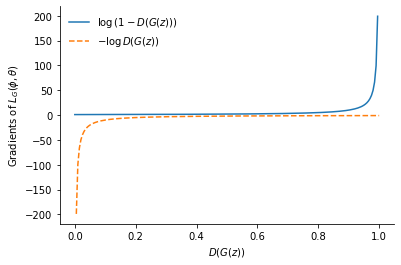

In [26]:
plt.figure()
plt.plot(d_g_x, grad1, label=r"$\log{(1 - D(G(z)))}$")
plt.plot(d_g_x, grad2, label=r"$-\log{D(G(z))}$", ls="--")
plt.xlabel("$D(G(z))$")
plt.ylabel("Loss Gradient wrt $D(G(z))$")
# plt.ylabel(r"Gradients of $L_G(\phi,\theta)$")

sns.despine()
plt.legend(frameon=False)
savefig("Gradients-of-Generator-Loss")
plt.show()

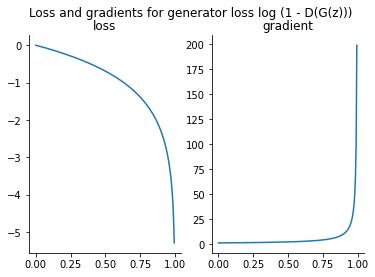

In [40]:
d_g_x = jnp.linspace(0.0, 1.0, 200)
loss = jnp.log(1 - d_g_x)
grad = 1 / (1 - d_g_x)

fig, axs = plt.subplots(1, 2)

# First plot the loss, and then the derivative.
axs[0].plot(d_g_x, loss)
axs[0].set_title("loss")

axs[1].plot(d_g_x, grad)
axs[1].set_title("gradient")

plt.suptitle("Loss and gradients for generator loss log (1 - D(G(z)))")
sns.despine()
plt.show()